# Опис даних

### Джерело
Дані взяті з Kaggle за посиланням **Rossmann Store Sales**.
https://www.kaggle.com/competitions/rossmann-store-sales/data

### Основні характеристики
- **Продажі за день** для магазинів Rossmann.
- **Інформація про магазини**: тип, конкуренція, промоції.
- **Часові дані**: дата, день тижня.
- **Додаткові параметри**: святкові дні, шкільні канікули.
- **Формат даних**: CSV-файли з інформацією про магазини та продажі.

### Available Files
- **train.csv**: Historical data including `Sales`.
- **test.csv**: Historical data excluding `Sales`.
- **sample_submission.csv**: A sample submission file in the correct format.
- **store.csv**: Supplemental information about the stores.

---

# Data Fields

### General Information
- **Id**: An identifier representing a `(Store, Date)` duple within the test set.
- **Store**: A unique identifier for each store.
- **Sales**: The turnover for any given day (this is the target variable for prediction).
- **Customers**: The number of customers visiting on a given day.
- **Open**: Indicates whether the store was open:
  - `0`: Closed
  - `1`: Open
- **StateHoliday**: Indicates a state holiday. Normally, all stores (with few exceptions) are closed:
  - `a`: Public holiday
  - `b`: Easter holiday
  - `c`: Christmas
  - `0`: None (not a holiday)
- **SchoolHoliday**: Indicates if the `(Store, Date)` was affected by the closure of public schools:
  - `0`: No school holiday
  - `1`: School holiday

---

### Store Characteristics
- **StoreType**: Differentiates between 4 types of store models:
  - `a`, `b`, `c`, `d`
- **Assortment**: Describes the level of assortment:
  - `a`: Basic
  - `b`: Extra
  - `c`: Extended
- **CompetitionDistance**: Distance in meters to the nearest competitor store.
- **CompetitionOpenSince[Month/Year]**: Approximate month and year when the nearest competitor store was opened.

---

### Promotional Information
- **Promo**: Indicates if a store is running a promotion on that day:
  - `0`: No promotion
  - `1`: Promotion running
- **Promo2**: Indicates if the store is participating in Promo2, a continuous promotion:
  - `0`: Store is not participating
  - `1`: Store is participating
- **Promo2Since[Year/Week]**: The year and calendar week when the store started participating in Promo2.
- **PromoInterval**: Describes the months when Promo2 starts anew for a store. For example:
  - `"Feb,May,Aug,Nov"`: Promo2 starts in February, May, August, and November of each year.

---
# 2. Формулювання запитань

## Головне питання:
- **Які чинники найбільше впливають на обсяг продажів?**

---

## Додаткові запитання:

1. Як впливає кількість клієнтів на обсяг продажів?
2. Чи спостерігаються сезонні тренди у продажах (щомісячно, щорічно)?
3. Як змінюється продаж залежно від типу магазину (StoreType)?
4. Чи впливають дні тижня на обсяг продажів?
5. Який вплив має реклама (Promo) на продажі?
6. Чи є різниця у продажах під час святкових днів (StateHoliday)?
7. Який вплив має щільність клієнтів (Sales/Customers)?
8. Чи існує кореляція між розміром магазину (CompetitionDistance) і продажами?
9. Як на продажі впливає участь у шкільних канікулах (SchoolHoliday)?
10. Як зміна в промоціях (Promo, Promo2) впливає на кількість клієнтів (Customers)?
11. Який вплив має тип асортименту (Assortment) на продажі?
12. Як тип асортименту (Assortment) впливає на середній обсяг продажів у різних типах магазинів (StoreType)?
13. Як впливає участь у промоціях (Promo та Promo2) на середній обсяг продажів у різні місяці року?

### Кроки аналізу

1. **Попередня обробка даних**:
   - Завантаження даних.
   - Перевірка наявності пропущених значень.
   - Очистка та нормалізація.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
cd C:\Users\Jools\Documents\DA\data\final

C:\Users\Jools\Documents\DA\data\final


In [5]:
store = pd.read_csv("store.csv")
train = pd.read_csv('train.csv', low_memory=False)

In [7]:
print("Store data preview:")
store.head()

Store data preview:


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
print("\nTrain data preview:")
train.head()


Train data preview:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Злиття даних про магазини з даними про продажі

In [11]:
combined_data = pd.merge(train, store, how="left", on="Store")
num_rows, num_columns = combined_data.shape
print(f"Кількість рядків: {num_rows}")
print(f"Кількість колонок: {num_columns}")

Кількість рядків: 1017209
Кількість колонок: 18


Перевіримо дані на пропущені значення та дублі. Також проведемо зміну типів деяких даних.

In [13]:
# Перевіримо дані на пропущені значення та дублі
print("\nMissing values:")
print(combined_data.isnull().sum())

# Заповнюємо пропущені значення
combined_data.fillna({
    'CompetitionDistance': combined_data['CompetitionDistance'].median(),
    'Promo2SinceWeek': 0,
    'Promo2SinceYear': 0,
    'PromoInterval': 'None'
}, inplace=True)

# Перевіряємо на дублікати
duplicates = combined_data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Видаляємо дублікати, якщо вони є
if duplicates > 0:
    combined_data.drop_duplicates(inplace=True)
    print(f"Dropped {duplicates} duplicate rows.")

# Зміна типів даних
combined_data['Date'] = pd.to_datetime(combined_data['Date'])
combined_data['Year'] = combined_data['Date'].dt.year
combined_data['Month'] = combined_data['Date'].dt.month
combined_data['DayOfWeek'] = combined_data['Date'].dt.dayofweek
combined_data['WeekOfYear'] = combined_data['Date'].dt.isocalendar().week


Missing values:
Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

Number of duplicate rows: 0


In [15]:
# Перевірка після змін
print("\nUpdated data preview:")
combined_data.head()


Updated data preview:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear
0,1,4,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,0.0,0.0,None,2015,7,31
1,2,4,2015-07-31,6064,625,1,1,0,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,4,2015-07-31,8314,821,1,1,0,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,4,2015-07-31,13995,1498,1,1,0,1,c,...,620.0,9.0,2009.0,0,0.0,0.0,None,2015,7,31
4,5,4,2015-07-31,4822,559,1,1,0,1,a,...,29910.0,4.0,2015.0,0,0.0,0.0,None,2015,7,31


In [17]:
print("Типи даних у колонках:")
for column in combined_data.columns:
    print(f"{column}: {combined_data[column].dtype}")

Типи даних у колонках:
Store: int64
DayOfWeek: int32
Date: datetime64[ns]
Sales: int64
Customers: int64
Open: int64
Promo: int64
StateHoliday: object
SchoolHoliday: int64
StoreType: object
Assortment: object
CompetitionDistance: float64
CompetitionOpenSinceMonth: float64
CompetitionOpenSinceYear: float64
Promo2: int64
Promo2SinceWeek: float64
Promo2SinceYear: float64
PromoInterval: object
Year: int32
Month: int32
WeekOfYear: UInt32


In [19]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

1. Як впливає кількість клієнтів на обсяг продажів?

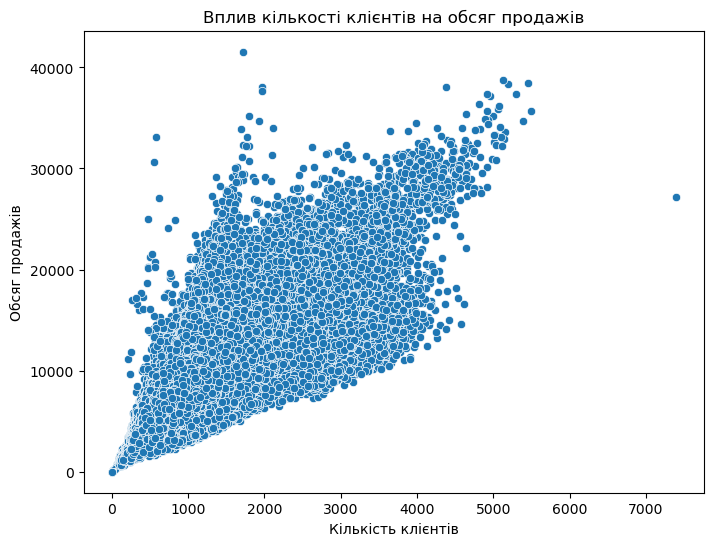

Кореляція між кількістю клієнтів та обсягом продажів: 0.8947107733017019


In [23]:
# Обчислення кореляції між кількістю клієнтів та обсягом продажів
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Customers', y='Sales', data=combined_data)
plt.title("Вплив кількості клієнтів на обсяг продажів")
plt.xlabel("Кількість клієнтів")
plt.ylabel("Обсяг продажів")
plt.show()

# Перевірка кореляції
correlation = combined_data['Customers'].corr(combined_data['Sales'])
print(f"Кореляція між кількістю клієнтів та обсягом продажів: {correlation}")

Графік демонструє чітку позитивну кореляцію між кількістю клієнтів та обсягом продажів. Зі збільшенням кількості клієнтів обсяг продажів також зростає.
Значення кореляції у 0.8947 свідчить про сильну залежність між цими двома змінними.

Зі збільшенням кількості клієнтів можна побачити більшу варіативність обсягів продажів, що може свідчити про вплив додаткових факторів.
Для збільшення продажів варто зосередитися на збільшенні кількості клієнтів, оскільки це безпосередньо впливає на доходи.

Також можемо побачити невеликий викид у даних у правому верхньому куті.

2. Чи спостерігаються сезонні тренди у продажах (щомісячно, щорічно)?

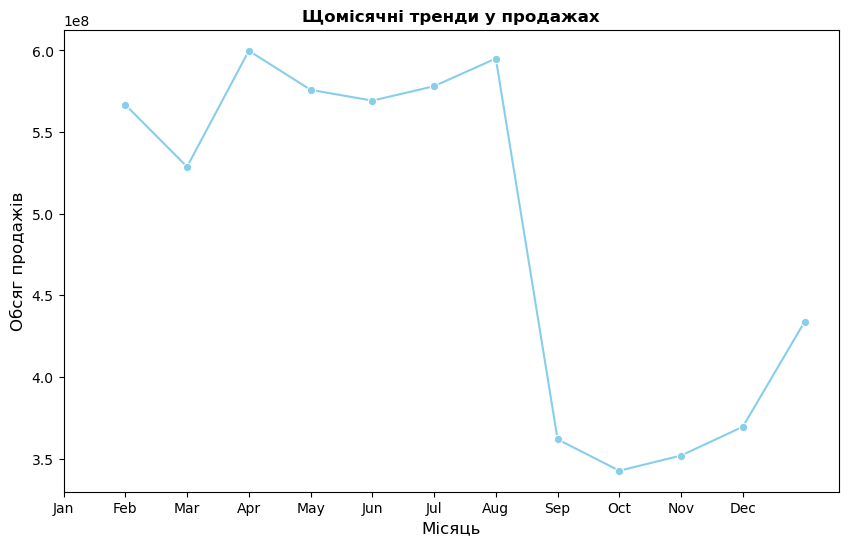

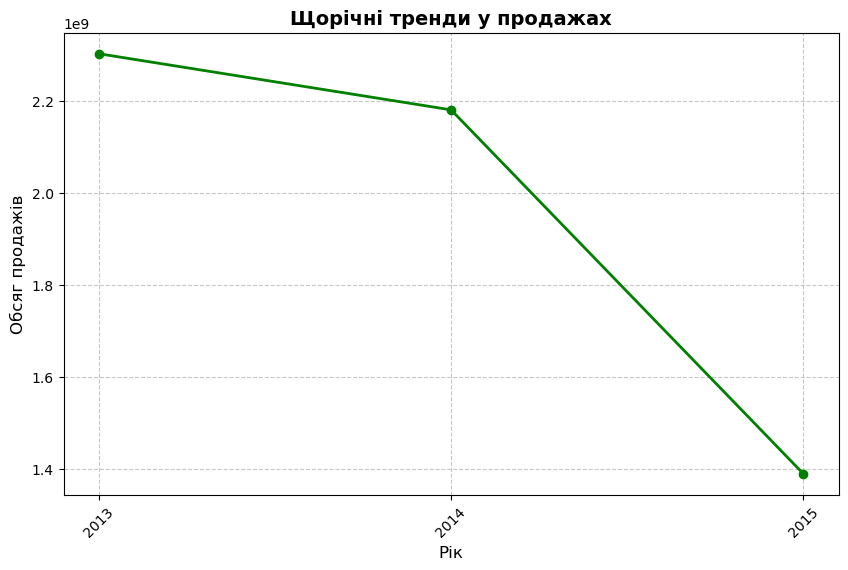

In [25]:
# Щомісячний тренд продажів
monthly_sales = combined_data.groupby('Month')['Sales'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='skyblue')

plt.title("Щомісячні тренди у продажах", fontweight='bold')
plt.xlabel("Місяць", fontsize=12)
plt.ylabel("Обсяг продажів", fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Щорічний тренд продажів
annual_sales = combined_data.groupby('Year')['Sales'].sum()

plt.figure(figsize=(10, 6))
annual_sales.plot(kind='line', color='green', marker='o', linestyle='-', linewidth=2)

plt.title("Щорічні тренди у продажах", fontsize=14, fontweight='bold')
plt.xlabel("Рік", fontsize=12)
plt.ylabel("Обсяг продажів", fontsize=12)
plt.xticks(ticks=annual_sales.index, labels=[int(year) for year in annual_sales.index], rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Обсяг продажів залишається стабільним у першій половині року, з піком у квітні та серпні.
У вересні продажі різко знижуються, досягнувши найнижчого рівня у жовтні.
Починаючи з листопада, продажі поступово відновлюються, досягнувши зростання у грудні.
Зростання в грудні, ймовірно, зумовлене святковим сезоном, що традиційно стимулює збільшення продажів.

Як рекомендації можна розглянути додаткові маркетингові активності у період низьких прожадів для мінімізації сезонного спаду.

Щодо щорічних тенденцій, то можемо побачити, що у 2013-2014 роках обсяг продажів залишався на високому рівні, а у 2015 році різко знизився. Це пов'язано із неповноцінністю даних за 2015 рік (дані до 31 липня 2015 року)

In [27]:
# Перевірка початкової та останньої дати продажів у даних
start_date = combined_data['Date'].min()
end_date = combined_data['Date'].max()

print(f"Початкова дата продажів: {start_date}")
print(f"Остання дата продажів: {end_date}")

Початкова дата продажів: 2013-01-01 00:00:00
Остання дата продажів: 2015-07-31 00:00:00


3. Як змінюється продаж залежно від типу магазину (StoreType)?


Середній обсяг продажів залежно від типу магазину:
StoreType
a     5738.18
b    10058.84
c     5723.63
d     5641.82
Name: Sales, dtype: float64


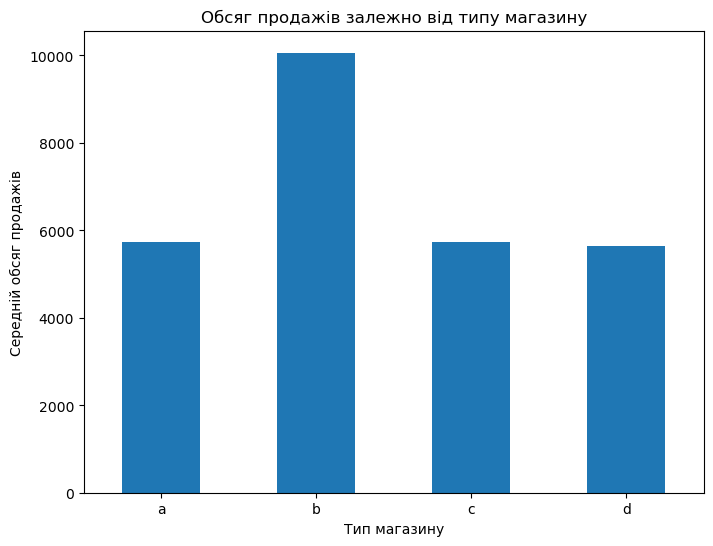

In [29]:
# Середній обсяг продажів для кожного типу магазину, заокруглений до двох знаків після коми
store_sales = combined_data.groupby('StoreType')['Sales'].mean().round(2)

print("\nСередній обсяг продажів залежно від типу магазину:")
print(store_sales)

plt.figure(figsize=(8, 6))
store_sales.plot(kind='bar')
plt.title("Обсяг продажів залежно від типу магазину")
plt.xlabel("Тип магазину")
plt.ylabel("Середній обсяг продажів")
plt.xticks(rotation=0)
plt.show()

На графіку можемо побачити, що найбільше продажів приносить магазин b (10058.84), решта ж магазинів мають нижчі показники 5600-5700. 
Доцільно буде у подальшому проаналізувати асортимент кожного з магазинів та інші фактори, які могли впливати на таку значущу різницю.

4. Чи впливають дні тижня на обсяг продажів?


Середній обсяг продажів для кожного дня тижня:
Понеділок    7809.04
Вівторок     7005.24
Середа       6555.88
Четвер       6247.58
П’ятниця     6723.27
Субота       5847.56
Неділя        204.18
Name: Sales, dtype: float64


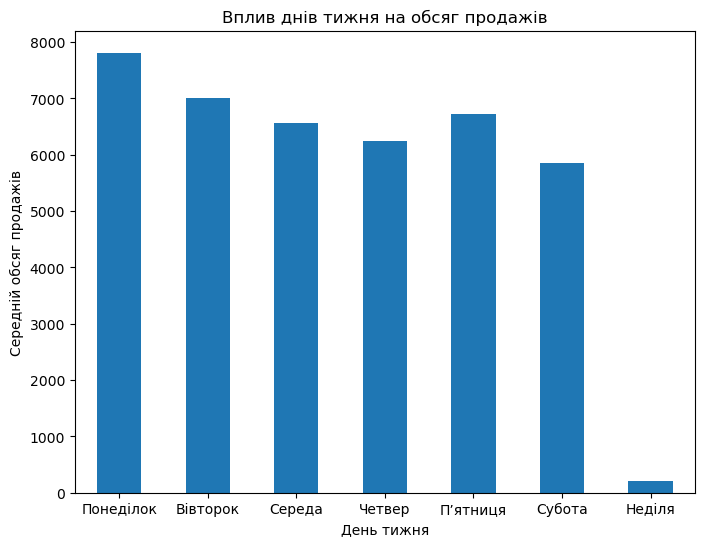

In [31]:
# Середній обсяг продажів для кожного дня тижня
day_of_week_sales = combined_data.groupby('DayOfWeek')['Sales'].mean().round(2)

# Словник з назвами днів тижня
day_names = ['Понеділок', 'Вівторок', 'Середа', 'Четвер', 'П’ятниця', 'Субота', 'Неділя']
day_of_week_sales.index = day_names

print("\nСередній обсяг продажів для кожного дня тижня:")
print(day_of_week_sales)

plt.figure(figsize=(8, 6))
day_of_week_sales.plot(kind='bar')
plt.title("Вплив днів тижня на обсяг продажів")
plt.xlabel("День тижня")
plt.ylabel("Середній обсяг продажів")
plt.xticks(rotation=0)
plt.show()

Графік показує, що найбільший середній обсяг продажів припадає на понеділок. Протягом тижня спостерігається поступове зниження продажів, яке досягає найнижчого значення у четвер. У п'ятницю обсяги продажів дещо підвищуються, що може бути пов'язано із завершенням робочого тижня. 

Вихідні демонструють значний спад активності, особливо неділя, яка має найнижчі показники серед усіх днів. 

Для покращення ситуації варто розглянути запуск акцій чи спеціальних пропозицій у вихідні, а також зосередити маркетингові активності на початку та середині тижня для підтримки стабільних продажів.

5. Який вплив має реклама (Promo) на продажі?

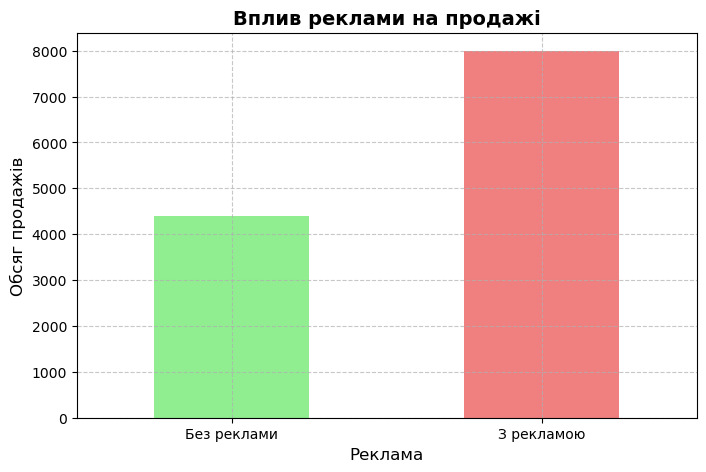

In [33]:
# Середній обсяг продажів для магазинів з рекламою і без
promo_sales = combined_data.groupby('Promo')['Sales'].mean().round(2)

# Візуалізація
plt.figure(figsize=(8, 5))
promo_sales.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title("Вплив реклами на продажі", fontsize=14, fontweight='bold')
plt.xlabel("Реклама", fontsize=12)
plt.ylabel("Обсяг продажів", fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Без реклами', 'З рекламою'], rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Графік демонструє суттєвий вплив реклами на обсяг продажів. Без рекламної підтримки середній обсяг продажів становить приблизно 4000, тоді як із залученням реклами цей показник зростає до 8000, що майже вдвічі більше. 

Це показує високу ефективність рекламних кампаній та інвестування в маркетингові активності має потенціал для подальшого зростання показників продажів.

6. Чи є різниця у продажах під час святкових днів (StateHoliday)?

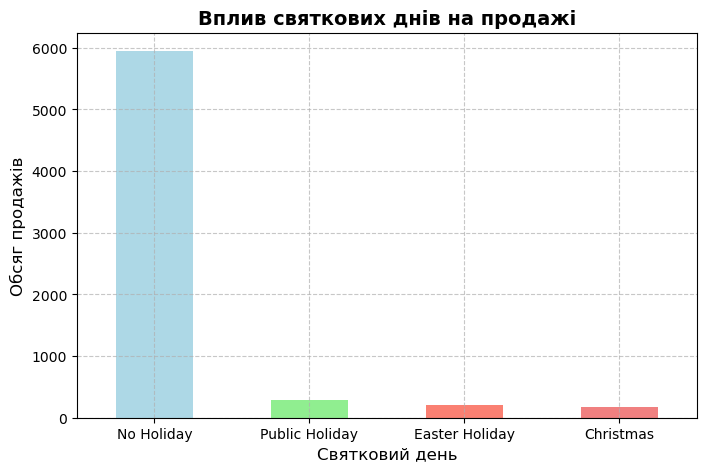

In [35]:
# Середній обсяг продажів під час святкових днів і без
holiday_sales = combined_data.groupby('StateHoliday')['Sales'].mean().round(2)

# Маппінг святкових днів на їхні назви
holiday_names = {
    'a': 'Public Holiday',
    'b': 'Easter Holiday',
    'c': 'Christmas',
    '0': 'No Holiday'
}

# Візуалізація
plt.figure(figsize=(8, 5))
holiday_sales.plot(kind='bar', color=['lightblue', 'lightgreen', 'salmon', 'lightcoral'])
plt.title("Вплив святкових днів на продажі", fontsize=14, fontweight='bold')
plt.xlabel("Святковий день", fontsize=12)
plt.ylabel("Обсяг продажів", fontsize=12)

# Встановлення назв свят на осі X
plt.xticks(ticks=range(len(holiday_sales)), labels=[holiday_names.get(i, i) for i in holiday_sales.index], rotation=0, fontsize=10)

plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Графік демонструє значне зниження обсягу продажів під час святкових днів у порівнянні зі звичайними днями. У дні без свят середній обсяг продажів становить близько 6000, тоді як під час публічних свят, Великодніх свят чи Різдва цей показник падає майже до нуля. Це може свідчити про те, що споживачі значно зменшують свою активність у святковий період, можливо, через зміну пріоритетів або обмежену доступність товарів чи послуг.

Для покращення продажів у святкові дні можна розглянути спеціальні акції чи пропозиції, які будуть привабливими для клієнтів у цей період, або перенести акцент на передсвяткові кампанії, щоб стимулювати покупки до початку свят.

7. Який вплив має щільність клієнтів (Sales/Customers)?

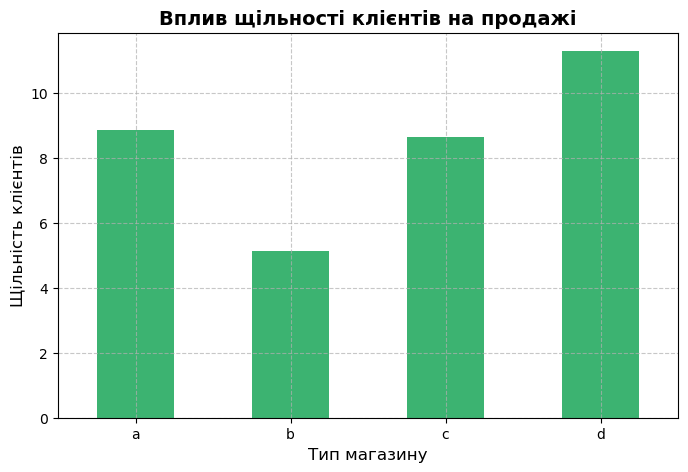

In [37]:
# Додавання нового стовпця для щільності клієнтів
combined_data['CustomerDensity'] = combined_data['Sales'] / combined_data['Customers']

# Середня щільність клієнтів для кожного магазину
store_density = combined_data.groupby('StoreType')['CustomerDensity'].mean().round(2)

# Візуалізація
plt.figure(figsize=(8, 5))
store_density.plot(kind='bar', color='mediumseagreen')
plt.title("Вплив щільності клієнтів на продажі", fontsize=14, fontweight='bold')
plt.xlabel("Тип магазину", fontsize=12)
plt.ylabel("Щільність клієнтів", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Графік демонструє вплив щільності клієнтів на різні типи магазинів. Найвища щільність клієнтів спостерігається у магазинах типу d та a, тоді як типи b і c мають значно нижчі показники. Це може свідчити про різні фактори, які впливають на популярність магазинів, зокрема їхнє розташування, асортимент товарів або маркетингову стратегію.

Для магазинів з меншою щільністю клієнтів варто розглянути можливість покращення маркетингу, оптимізації асортименту чи аналізу причин низького трафіку.

8. Чи існує кореляція між розміром магазину (CompetitionDistance) і продажами?


Таблиця кореляції між відстанню до конкурента та обсягом продажів:
                     CompetitionDistance    Sales
CompetitionDistance              1.00000 -0.01887
Sales                           -0.01887  1.00000


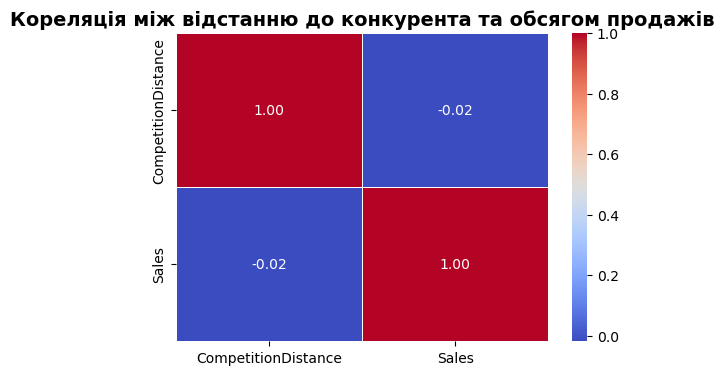

In [39]:
# Кореляція між розміром магазину (CompetitionDistance) і продажами
competition_sales_corr = combined_data[['CompetitionDistance', 'Sales']].corr()

# Побудова таблиці кореляції
print("\nТаблиця кореляції між відстанню до конкурента та обсягом продажів:")
print(competition_sales_corr)

# Візуалізація кореляційної матриці
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(competition_sales_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Кореляція між відстанню до конкурента та обсягом продажів", fontsize=14, fontweight='bold')
plt.show()

Між відстанню до конкурента і обсягом продажів існує слабкий негативний зв'язок із коефіцієнтом кореляції -0.02. Це свідчить про те, що відстань до конкурента практично не впливає на обсяг продажів, або цей вплив є незначним.

9. Як на продажі впливає участь у шкільних канікулах (SchoolHoliday)?


Середній обсяг продажів під час шкільних канікул:
SchoolHoliday
0    5620.98
1    6476.52
Name: Sales, dtype: float64


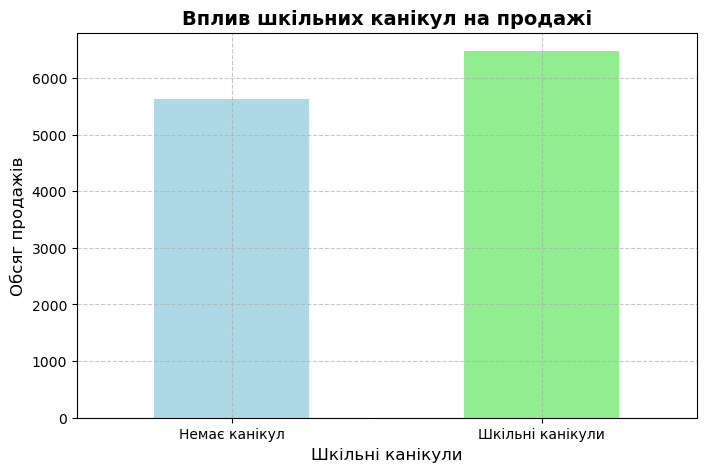

In [41]:
# Як на продажі впливає участь у шкільних канікулах (SchoolHoliday)?
school_holiday_sales = combined_data.groupby('SchoolHoliday')['Sales'].mean().round(2)
print("\nСередній обсяг продажів під час шкільних канікул:")
print(school_holiday_sales)

school_holiday_sales.index = school_holiday_sales.index.map({0: 'Немає канікул', 1: 'Шкільні канікули'})

# Візуалізація
plt.figure(figsize=(8, 5))
school_holiday_sales.plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title("Вплив шкільних канікул на продажі", fontsize=14, fontweight='bold')
plt.xlabel("Шкільні канікули", fontsize=12)
plt.ylabel("Обсяг продажів", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Графік демонструє вплив шкільних канікул на обсяг продажів. Під час шкільних канікул спостерігається деяке підвищення продажів порівняно з періодами, коли канікул немає. Це може бути пов'язано зі збільшенням активності сімей, які проводять більше часу разом і здійснюють більше покупок, наприклад, на відпочинок, розваги або товари для дітей.

Як рекомендація для ефективнішого використання часу під час шкільних канікул може бути запуск тематичних акцій чи спеціальних пропозицій, спрямованих на сімейну аудиторію. 

10. Як зміна в промоціях (Promo, Promo2) впливає на кількість клієнтів (Customers)?


In [43]:
import scipy.stats as stats

# Як зміна в промоціях (Promo, Promo2) впливає на кількість клієнтів (Customers)?

# Фільтруємо дані для промоцій
promo1_customers = combined_data[combined_data['Promo'] == 1]['Customers']
promo0_customers = combined_data[combined_data['Promo'] == 0]['Customers']

# Виконуємо Z-тест для порівняння середніх значень
z_stat, p_value = stats.ttest_ind(promo1_customers, promo0_customers, equal_var=False)

# Виводимо результат
print("\nZ-тест для порівняння середніх значень кількості клієнтів між промоцією та без:")
print(f"Z-статистика: {z_stat}")
print(f"P-значення: {p_value}")

# Визначаємо, чи є статистично значуща різниця
if p_value < 0.05:
    print("Різниця між групами статистично значуща (p < 0.05).")
else:
    print("Різниця між групами не є статистично значущою (p >= 0.05).")



Z-тест для порівняння середніх значень кількості клієнтів між промоцією та без:
Z-статистика: 342.18659100902664
P-значення: 0.0
Різниця між групами статистично значуща (p < 0.05).


Результати Z-тесту свідчать про статистично значущу різницю між середніми значеннями кількості клієнтів у групах з промоцією та без неї. Z-статистика становить 342.19, а p-значення дорівнює 0.0. Це означає, що ймовірність випадкової різниці між групами практично відсутня.

Промоція має суттєвий вплив на кількість клієнтів, підтверджуючи, що маркетингові активності значно підвищують залученість клієнтів. На основі цих результатів можна рекомендувати регулярне використання промоційних заходів для підтримки та збільшення клієнтської бази


11. Який вплив має тип асортименту (Assortment) на продажі?


Середній обсяг продажів залежно від типу асортименту:
Assortment
a    5481.03
b    8553.93
c    6058.68
Name: Sales, dtype: float64


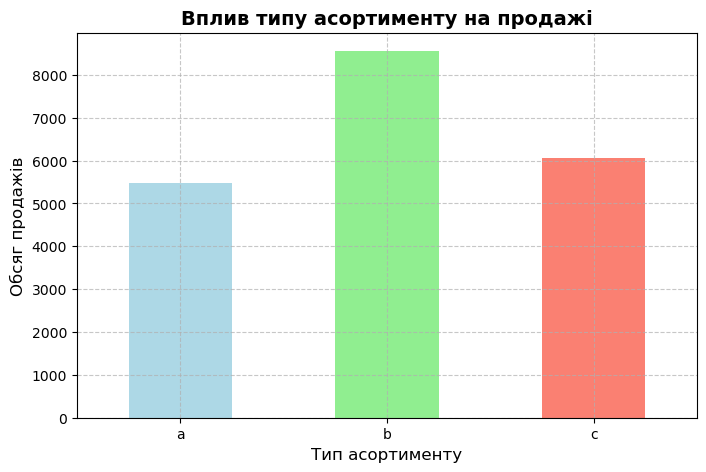

In [45]:
# Вплив типу асортименту (Assortment) на продажі
assortment_sales = combined_data.groupby('Assortment')['Sales'].mean().round(2)
print("\nСередній обсяг продажів залежно від типу асортименту:")
print(assortment_sales)

# Візуалізація
plt.figure(figsize=(8, 5))
assortment_sales.plot(kind='bar', color=['lightblue', 'lightgreen', 'salmon'])
plt.title("Вплив типу асортименту на продажі", fontsize=14, fontweight='bold')
plt.xlabel("Тип асортименту", fontsize=12)
plt.ylabel("Обсяг продажів", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Дані та графік показують, що обсяг продажів суттєво залежить від типу асортименту. 
Найвищий середній обсяг продажів спостерігається для типу асортименту b (Extra) – 8553.93, що значно перевищує показники для типів c (Extended) – 6058.68 і a (Basic) – 5481.03. Це свідчить про те, що розширений, але не перевантажений асортимент сприяє найбільшому залученню клієнтів та підвищенню продажів.

Асортимент типу a (Basic) має найнижчі продажі, можливо, через обмеженість пропозицій чи цін товарів, тоді як асортимент типу c (Extended), хоча і демонструє вищі продажі, все ж поступається b, ймовірно, через надмірну складність або перенасичення вибору для клієнтів.

12. Як тип асортименту (Assortment) впливає на середній обсяг продажів у різних типах магазинів (StoreType)?

In [47]:
# Впливу типу асортименту на продажі в різних типах магазинів
assortment_storetype_sales = combined_data.pivot_table(
    index='StoreType', 
    columns='Assortment', 
    values='Sales', 
    aggfunc='mean'
).round(2)

# Переіменування колонок для зручності
assortment_storetype_sales.columns = ['Basic', 'Extra', 'Extended']

# Відображення таблиці з підсвіткою кольорами
styled_table = assortment_storetype_sales.style.background_gradient(cmap='coolwarm').set_caption(
    "Вплив типу асортименту на середній обсяг продажів у різних типах магазинів"
)
styled_table

,Basic,Extra,Extended
StoreType,,,
a,5398.860000,nan,6310.870000
b,10821.620000,8553.930000,17969.560000
c,5647.170000,nan,5805.780000
d,5317.890000,nan,5826.410000


Таблиця демонструє, як різні типи асортименту впливають на середній обсяг продажів у різних типах магазинів. Магазини типу b показують найвищі результати для всіх рівнів асортименту, особливо для Extended, де середній обсяг продажів досягає 17969.56. Це значно перевищує показники інших типів магазинів. Тип асортименту Extra також успішно працює в магазинах типу b, тоді як для інших типів магазинів дані відсутні.

Магазини типу a, c та d мають значно нижчі показники незалежно від асортименту. Асортимент типу Extended демонструє кращі результати у цих магазинах порівняно з Basic, але значення залишаються значно нижчими, ніж у магазинів типу b.

Це свідчить про те, що успішність асортименту залежить не лише від його типу, а й від формату магазину.

13. Як впливає участь у промоціях (Promo та Promo2) на середній обсяг продажів у різні місяці року?

In [50]:
# Створення зведеної таблиці для аналізу впливу промоцій на продажі
promo_month_sales = combined_data.pivot_table(
    index=['Month'], 
    columns=['Promo', 'Promo2'], 
    values='Sales', 
    aggfunc='mean'
).round(2)

promo_month_sales.columns = promo_month_sales.columns.map(
    lambda x: (
        "Є промоція" if x[0] == 1 else "Немає промоції", 
        "Участь у Promo2" if x[1] == 1 else "Без участі у Promo2"
    )
)

print("\nСередній обсяг продажів залежно від участі в промоціях та місяців:")
styled_table = promo_month_sales.style.background_gradient(cmap='YlGnBu', axis=None).format("{:.2f}")
styled_table


Середній обсяг продажів залежно від участі в промоціях та місяців:


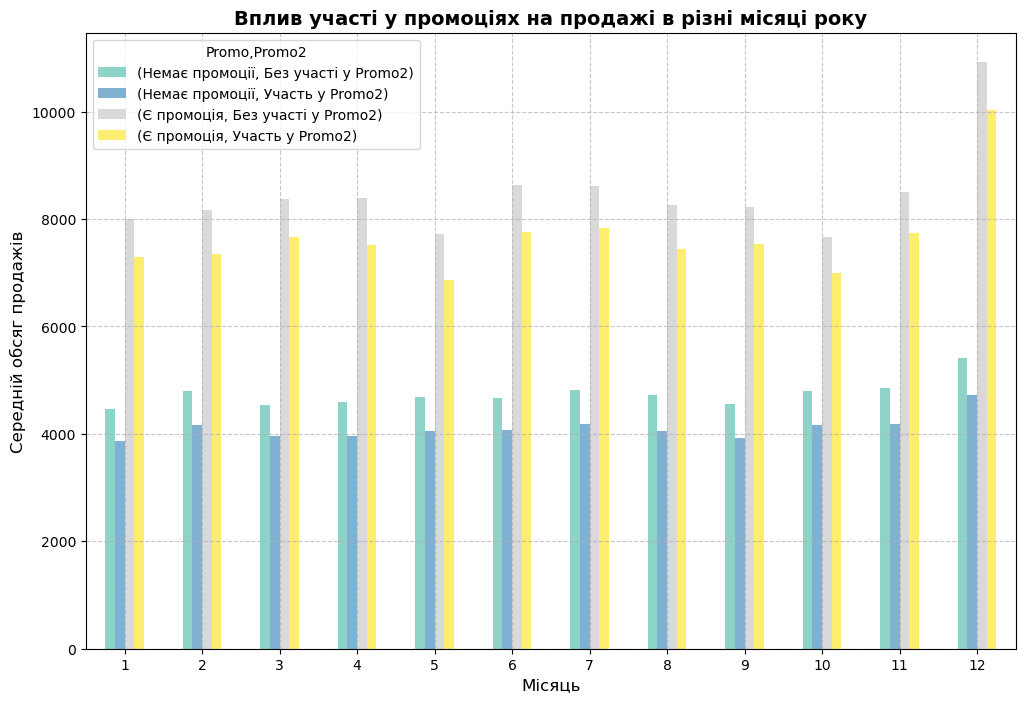

In [52]:
# Візуалізація
promo_month_sales.plot(kind='bar', figsize=(12, 8), colormap='Set3')
plt.title("Вплив участі у промоціях на продажі в різні місяці року", fontsize=14, fontweight='bold')
plt.xlabel("Місяць", fontsize=12)
plt.ylabel("Середній обсяг продажів", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Дані показують середній обсяг продажів залежно від місяця та участі у промоціях (Promo та Promo2). Помітно, що комбінація активної Promo та відсутньої Promo2 забезпечує найвищі середні продажі, особливо в грудні (10921.77). Це вказує на те, що Promo має сильний вплив на залучення клієнтів, тоді як Promo2, у поєднанні з Promo, зменшує обсяг продажів.

Протягом року продажі залишаються стабільними для неактивних промоцій, із незначними коливаннями між місяцями. У той же час, активна Promo забезпечує стабільно високі продажі в усіх місяцях, що свідчить про її ефективність незалежно від сезону.

Для максимізації продажів рекомендується використовувати Promo як основну стратегію з обмеженим або цілеспрямованим використанням Promo2. Окремо варто звернути увагу на грудень, коли промоції забезпечують найвищі показники, що пов'язано із сезонними святами.

# Загальні висновки

## Роль промоцій:
- Найбільший вплив на обсяг продажів мають **промоції**, особливо `Promo`, яка суттєво підвищує продажі в усі місяці року.  
- Комбінація `Promo` і `Promo2` дає нижчі результати, що вказує на можливе перенасичення клієнтів акціями.

## Тип асортименту:
- Асортимент типу **Extra** та **Extended** сприяє вищим продажам, особливо в магазинах типу `b`, де поєднання розширеного асортименту та формату магазину забезпечує найвищий обсяг продажів.

## Сезонність:
- Обсяг продажів залежить від **сезону**.  
- **Серпень** є найсильнішим місяцем за продажами, втім варто зважати, що дані за серпень-грудень 2015 року є відсутніми, що значно викривлює даний аналіз.

## Вплив клієнтських факторів:
- **Щільність клієнтів** позитивно впливає на продажі.  
- Тип магазину та асортимент відіграють важливу роль у тому, наскільки ефективно залучаються клієнти.

## Святкові дні:
- У **святкові дні** обсяг продажів суттєво знижується.  
- Це вказує на важливість акцентування на **передсвяткових кампаніях** для стимулювання попиту.

---

# Рекомендації

## Промоційна стратегія:
- Варто робити фокус на **Promo** як основній акції, обмежуючи або оптимізуючи використання **Promo2** для уникнення перенасичення клієнтів.
- Доцільним буде активне впровадження промоції в **грудні** та **літні місяці**, де їх ефективність максимальна.

## Робота зі святковими періодами:
- Доцільно розробляти маркетингові кампанії для **передсвяткових періодів**, коли спостерігається підвищений попит.
- У святкові дні варто використовувати акції для залучення клієнтів та стимулювання активності.

---

# Відповідь на питання:

**Які чинники найбільше впливають на обсяг продажів**

1. **Участь у промоціях**
2. **Тип асортименту**
3. **Сезонність**
4. **Тип магазину**